In [1]:
# from google.colab import drive
# drive.mount('/content/drive')
# base_dir='/content/drive/MyDrive/ucd/'
base_dir='../../../folders/'

In [2]:
import pandas as pd
import numpy as np
import pickle
import tensorflow as tf
from sklearn.metrics import classification_report,accuracy_score
from sklearn.model_selection import train_test_split
from keras.models import Sequential,load_model,load_model
from keras.layers import Conv1D, Conv2D,MaxPooling1D,MaxPooling2D, Dropout,Dense,Flatten,Activation, Flatten, BatchNormalization
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.regularizers import l2
import scipy.stats as stats
from keras.callbacks import ModelCheckpoint,EarlyStopping
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.utils import to_categorical
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.utils import shuffle
import matplotlib.pyplot as plt
from collections import Counter
from sklearn.preprocessing import LabelEncoder
# from imblearn.over_sampling import SMOTE
import warnings
warnings.filterwarnings("ignore")

2025-03-06 22:38:51.102793: I tensorflow/core/util/port.cc:113] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2025-03-06 22:38:51.136553: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2025-03-06 22:38:51.136577: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2025-03-06 22:38:51.137367: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2025-03-06 22:38:51.142346: I tensorflow/core/platform/cpu_feature_guar

In [3]:
data_base=[f'ucddb{i:003d}' for i in range(2, 29)]
data_base.remove('ucddb004')
data_base.remove('ucddb016')
print(data_base)

with open(base_dir+'tenSecond/ucddb002_win.pkl', 'rb') as f:
        res = pickle.load(f)
        stages = res['stages']
        ecg = np.array(res['ecg_win'])           
data_base.remove('ucddb002')    
  
for file in data_base:
        print(file)
        with open(base_dir+f'tenSecond/{file}_win.pkl', 'rb') as f:
                res = pickle.load(f)
                stages_file = res['stages']
                ecg_file = np.array(res['ecg_win'])     
        stages =np.concatenate((stages , stages_file),axis=0) 
        ecg =np.concatenate((ecg , ecg_file),axis=0) 
        del stages_file
        del ecg_file
print(stages.shape)
print(ecg.shape) 

['ucddb002', 'ucddb003', 'ucddb005', 'ucddb006', 'ucddb007', 'ucddb008', 'ucddb009', 'ucddb010', 'ucddb011', 'ucddb012', 'ucddb013', 'ucddb014', 'ucddb015', 'ucddb017', 'ucddb018', 'ucddb019', 'ucddb020', 'ucddb021', 'ucddb022', 'ucddb023', 'ucddb024', 'ucddb025', 'ucddb026', 'ucddb027', 'ucddb028']
ucddb003
ucddb005
ucddb006
ucddb007
ucddb008
ucddb009
ucddb010
ucddb011
ucddb012
ucddb013
ucddb014
ucddb015
ucddb017
ucddb018
ucddb019
ucddb020
ucddb021
ucddb022
ucddb023
ucddb024
ucddb025
ucddb026
ucddb027
ucddb028
(62247,)
(62247, 3840)


In [4]:
res = {'ecg':ecg, 'stages':stages}
with open(base_dir+'all/all.pkl', 'wb') as f:
    pickle.dump(res, f)
del res 
del ecg
del stages

In [5]:
with open(base_dir+'all/all.pkl', 'rb') as f:
        res = pickle.load(f)
        stages = np.array(res['stages'])
        ecg = np.array(res['ecg'])
del res      

In [6]:
print(stages.shape)

(62247,)


Class=0, n=14049 (22.570%)
Class=2, n=31164 (50.065%)
Class=3, n=7989 (12.834%)
Class=1, n=9045 (14.531%)


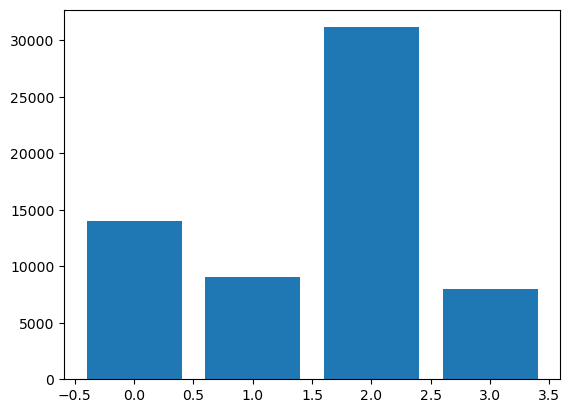

In [7]:
y=stages
y = LabelEncoder().fit_transform(y)
# summarize distribution
counter = Counter(y)
for k,v in counter.items():
 per = v / len(y) * 100
 print('Class=%d, n=%d (%.3f%%)' % (k, v, per))
# plot the distribution
plt.bar(counter.keys(), counter.values())
plt.show()

In [8]:
stages=np.reshape(stages,(len(stages),1))
all_data=np.hstack((ecg,stages))
del stages
del ecg
print(all_data.shape)

(62247, 3841)


In [9]:
all_data=shuffle(all_data) 

Class=0, n=14049 (22.570%)
Class=1, n=9045 (14.531%)
Class=3, n=7989 (12.834%)
Class=2, n=31164 (50.065%)


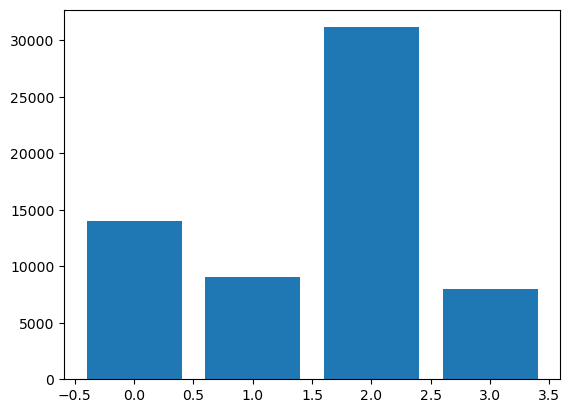

In [10]:
y=all_data[:,3840:3841]
y = LabelEncoder().fit_transform(y)
x=all_data[:,:3840]
# summarize distribution
counter = Counter(y)
for k,v in counter.items():
 per = v / len(y) * 100
 print('Class=%d, n=%d (%.3f%%)' % (k, v, per))
# plot the distribution
plt.bar(counter.keys(), counter.values())
plt.show()

In [11]:
x_train, x_test, y_train, y_test= train_test_split(x,y, test_size=0.2,stratify=y,random_state=1234)
del all_data

In [12]:
t1=y_test
print(classification_report(t1,t1))
del t1

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      2810
           1       1.00      1.00      1.00      1809
           2       1.00      1.00      1.00      6233
           3       1.00      1.00      1.00      1598

    accuracy                           1.00     12450
   macro avg       1.00      1.00      1.00     12450
weighted avg       1.00      1.00      1.00     12450



In [13]:
print(x_test.shape)
print(y_test.shape)
y_test=y_test.astype(int)
y_test=y_test.flatten()
print(y_test.shape)
encoder = LabelEncoder()
y_test=encoder.fit_transform(y_test)
y_test = encoder.transform(y_test)
y_test=to_categorical(y_test).astype(int)
result = {'x_test':x_test, 'y_test':y_test}
del x_test
del y_test
with open(base_dir+'all/test_all.pkl', 'wb') as f:
    pickle.dump(result, f)
del result  

(12450, 3840)
(12450,)
(12450,)


In [14]:
t1=y_train
print(classification_report(t1,t1))
del t1

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     11239
           1       1.00      1.00      1.00      7236
           2       1.00      1.00      1.00     24931
           3       1.00      1.00      1.00      6391

    accuracy                           1.00     49797
   macro avg       1.00      1.00      1.00     49797
weighted avg       1.00      1.00      1.00     49797



In [15]:
print(x_train.shape)
print(y_train.shape)
y_train=y_train.astype(int)
y_train=y_train.flatten()
print(y_train.shape)
encoder = LabelEncoder()
y_train=encoder.fit_transform(y_train)
y_train = encoder.transform(y_train)
y_train=to_categorical(y_train).astype(int)
result = {'x_train':x_train, 'y_train':y_train}
del x_train
del y_train
with open(base_dir+'all/train_all.pkl', 'wb') as f:
    pickle.dump(result, f)
del result 

(49797, 3840)
(49797,)
(49797,)
